# Gestionando la ausencia de datos

Ocurre con frecuencia que disponemos de catálogos de datos donde hay muestras incompletas.
Por ejemplo, los datos obtenidos a partir de encuestas donde se registran preguntas sin responder o sensores que no proporcionan ningún valor viable, etc.

**Hay que aceptarlo y saber gestionarlo**

```Pandas``` asigna el valor o el código NaN (Not a Number) a los valores desconocidos. Más especificamente, los objetos son designados como: None y las fechas como NaT.

Las operaciones que involucren este tipo de datos internamente han de manejar los correspondientes códigos: NaN, None o NaT. ¿Cómo afecta un NaN a una media aritmética?

En este capítulo trabajaremos con esta típología de valores.


In [1]:
import numpy as np

datos = np.array([1,2,np.nan,4,5,6,np.nan,8])
print(datos)

print(datos.mean())


[ 1.  2. nan  4.  5.  6. nan  8.]
nan


In [2]:
import pandas as pd

Volvemos a trabajor con el conjunto de datos ``data/who.csv``.

In [ ]:
df = pd.read_csv("data/who.csv")
df.isna().sum()

Como ya sabéis através de la API se puede obtener una descripción más detallada de las posibilidades de cada método de Python, y en especial de los métodos de Pandas. Para cargar un fichero de tamaño elevado es recomendable cargar aquellos atributos que nos interesen desde un principio usando el argumento: ``usecols``

[Enlace a documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [5]:
df = pd.read_csv("data/who.csv", usecols=["Country","Urban_population_growth"])
print(df[:5])

       Country  Urban_population_growth
0  Afghanistan                     5.44
1      Albania                     2.21
2      Algeria                     2.61
3      Andorra                      NaN
4       Angola                     4.14


### ¿Que valor corresponde a un NA del `DataFrame`? La función `isna()`

La función `isna()` de pandas se utiliza para detectar valores ausentes en un DataFrame o Series.
Devuelve un objeto del mismo tamaño, donde cada posición contiene `True` si el valor es `NaN`,
`None` o está faltante, y `False` en caso contrario.

Es especialmente útil para:
- Contar valores ausentes (`df.isna().sum()`).
- Filtrar filas con datos faltantes (`df[df['columna'].isna()]`).
- Explorar la presencia de valores nulos antes de aplicar métodos de imputación.

Mas información en la documentación: [Enlace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
)

In [6]:
df.isna().sum()

Country                     0
Urban_population_growth    14
dtype: int64

In [10]:
#¿Qué columnas tienen datos sin valor: NaN, NaT, None?
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html

print(df.columns[df.isna().any()])

# Equivale a preguntar si ¿existe algún valor positivo dentro de esas series?
print("-"*30)
print(df.any().isna())

Index(['Urban_population_growth'], dtype='object')
------------------------------
Country                    False
Urban_population_growth    False
dtype: bool


In [11]:
#No dudéis en ejecutar "partes" (dividamos la instrucción para comprenderla)
print(df.isna()[:5])

   Country  Urban_population_growth
0    False                    False
1    False                    False
2    False                    False
3    False                     True
4    False                    False


In [12]:
#¿Cuántas muestras son correctas? 
df.notna().sum()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html
# y de cuantas muestras?


Country                    202
Urban_population_growth    188
dtype: int64

In [13]:
df.notnull().sum() #ambas funcionas son equivalentes en Pandas, no en numpy

Country                    202
Urban_population_growth    188
dtype: int64

### Tratando la ausencia de datos
- Ignorando: "Hay X muestras válidas de tantas"
- Rellenando: reemplazar muestras desconocidas por otros valores: media, valor neutro, etc.

In [14]:
#La manera más optima de remplazar estos valores es con la función: fillna
print(df.fillna(0)[:5])


       Country  Urban_population_growth
0  Afghanistan                     5.44
1      Albania                     2.21
2      Algeria                     2.61
3      Andorra                     0.00
4       Angola                     4.14


In [16]:
# Si queremos que nuestra variable de dataframe contenga dichas asignaciones recordad asignar la operación a la variable pertinente o a una nueva
df = df.fillna(0) 

### Maneras de rellenar una serie con datos NA

Cuando los dataframes contienen números la operabildad con valores perdidos puede gestionarse de manera más eficiente. Pongamos un ejemplo:

In [17]:
import numpy as np

np.random.seed(20)

#Creamos un dataframe 
df = pd.DataFrame(np.random.randn(5, 3), 
                     index=['a', 'b', 'c', 'd', 'e'],
                     columns=['one', 'two', 'three'])
print(df)

        one       two     three
a  0.883893  0.195865  0.357537
b -2.343262 -1.084833  0.559696
c  0.939469 -0.978481  0.503097
d  0.406414  0.323461 -0.493411
e -0.792017 -0.842368 -1.279503


In [18]:
#Creamos valores NaN para testear 
df.two[df.two<0]=np.nan
print(df)

        one       two     three
a  0.883893  0.195865  0.357537
b -2.343262       NaN  0.559696
c  0.939469       NaN  0.503097
d  0.406414  0.323461 -0.493411
e -0.792017       NaN -1.279503


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_66062/13172693.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.two[df.two<0]=np.nan


Podemos usar ```fillna``` para rellenar de diversas maneras la serie o series. Por ejemplo, usando una operación de agregación como la media

In [19]:
print(df)
print("-"*33)
print(df.fillna(df.mean()))

        one       two     three
a  0.883893  0.195865  0.357537
b -2.343262       NaN  0.559696
c  0.939469       NaN  0.503097
d  0.406414  0.323461 -0.493411
e -0.792017       NaN -1.279503
---------------------------------
        one       two     three
a  0.883893  0.195865  0.357537
b -2.343262  0.259663  0.559696
c  0.939469  0.259663  0.503097
d  0.406414  0.323461 -0.493411
e -0.792017  0.259663 -1.279503


In [20]:
#Con un valor en concreto del propio dataframe
print(df.fillna("HOLA"))
print("-"*33)
print(df.fillna(df.loc["a", ["one"]].values[0]))

        one       two     three
a  0.883893  0.195865  0.357537
b -2.343262      HOLA  0.559696
c  0.939469      HOLA  0.503097
d  0.406414  0.323461 -0.493411
e -0.792017      HOLA -1.279503
---------------------------------
        one       two     three
a  0.883893  0.195865  0.357537
b -2.343262  0.883893  0.559696
c  0.939469  0.883893  0.503097
d  0.406414  0.323461 -0.493411
e -0.792017  0.883893 -1.279503


#### Podemos rellenar con datos interpolados

En la documentación vemos una serie de ejemplos: [Interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html)

In [21]:
print(df)
print("-"*35)
print(df.interpolate())

        one       two     three
a  0.883893  0.195865  0.357537
b -2.343262       NaN  0.559696
c  0.939469       NaN  0.503097
d  0.406414  0.323461 -0.493411
e -0.792017       NaN -1.279503
-----------------------------------
        one       two     three
a  0.883893  0.195865  0.357537
b -2.343262  0.238397  0.559696
c  0.939469  0.280929  0.503097
d  0.406414  0.323461 -0.493411
e -0.792017  0.323461 -1.279503


In [22]:
print(df.interpolate(axis=1)) # Tomemos como referencia el valor NA de (b,"two")
print("--"*35)
print(df.mean(axis=1).b)

        one       two     three
a  0.883893  0.195865  0.357537
b -2.343262 -0.891783  0.559696
c  0.939469  0.721283  0.503097
d  0.406414  0.323461 -0.493411
e -0.792017 -1.035760 -1.279503
----------------------------------------------------------------------
-0.8917828081181468


In [23]:
# Para usar otro tipo de interpolaciones es recomendable tener un índice numérico por cuestiones de frecuencia en el método de interpolación
df.index = range(len(df))
print(df.two.interpolate(method="pad"))

0    0.195865
1    0.195865
2    0.195865
3    0.323461
4    0.323461
Name: two, dtype: float64


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_66062/2480900594.py:3: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df.two.interpolate(method="pad"))


In [24]:
print(df.two.interpolate(method="nearest"))

0    0.195865
1    0.195865
2    0.323461
3    0.323461
4         NaN
Name: two, dtype: float64


In [25]:
print("Valores interpolados:" + str(df.two.interpolate().count()-df.two.count()))

Valores interpolados:3


### Eliminación de valores NA

Existen operaciones para la eliminación de valores NA

In [26]:
print(df)
print("-"*35)
print(df.dropna())

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

        one       two     three
0  0.883893  0.195865  0.357537
1 -2.343262       NaN  0.559696
2  0.939469       NaN  0.503097
3  0.406414  0.323461 -0.493411
4 -0.792017       NaN -1.279503
-----------------------------------
        one       two     three
0  0.883893  0.195865  0.357537
3  0.406414  0.323461 -0.493411


O bien, podemos borrar cambiando el eje ``axis=0`` o 1

In [27]:
df.dropna(axis=1)

,one,three
0,0.883893,0.357537
1,-2.343262,0.559696
2,0.939469,0.503097
3,0.406414,-0.493411
4,-0.792017,-1.279503


### Ejercicios

**1) Del fichero who.csv, contabiliza cuántos paises tienen algun valor NaN.**

In [29]:
df = pd.read_csv("data/who.csv")
df.isna()

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,False,False,False,False,False,True,True,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**1b) Ordena el anterior resultado para identificar cuál es el pais con mayor número de campos desconocidos.**

**2) who.csv, Selecciona la primera, tercera y decima columna, de las filas comprendidas entre la 100 y la 150.**

**2b) ¿Cuántos valores NaN hay presentes?**

**2c) Crea un nuevo dataframe donde los NaN sean cero.**

**2d) Elimina aquellas filas de la anterior selección donde haya NaN.**

# Series Temporales
Las series temporales son muestras de valores tomadas a lo largo del tiempo con un muestreo generalmente equidistante. Por ejemplo, información económica, demográfica, meteorológica; registros de seguridad, actividad, etc.

La biblioteca Pandas gestiona las series temporales utilizando el índice: una fecha (`datetime`):
https://docs.python.org/es/3/library/datetime.html


El índice de un _dataframe_ es el pilar básico de acceso a los valores, por lo que su uso simplifica procesos de filtrado, selección, interpolación, etc.

Enlace a la documentación: [TimeSeries](https://pandas.pydata.org/docs/user_guide/timeseries.html)

In [94]:
import pandas as pd
df = pd.read_csv("data/rdu-weather-history.csv",sep=";")  
#Qué contiene el fichero
print(df.head())

         date  temperaturemin  temperaturemax  precipitation  snowfall  \
0  2015-04-08            62.1            84.0           0.00       0.0   
1  2015-04-20            63.0            78.1           0.28       0.0   
2  2015-04-26            45.0            54.0           0.02       0.0   
3  2015-04-28            39.0            69.1           0.00       0.0   
4  2015-05-03            46.9            79.0           0.00       0.0   

   snowdepth  avgwindspeed  fastest2minwinddir  fastest2minwindspeed  \
0        0.0          5.82                40.0                 29.97   
1        0.0         11.86               180.0                 21.92   
2        0.0          5.82                50.0                 12.97   
3        0.0          2.68                40.0                 12.08   
4        0.0          2.68               200.0                 12.08   

   fastest5secwinddir  ...  drizzle snow freezingrain smokehaze thunder  \
0                30.0  ...       No   No       

In [ ]:
type(df.date[0])

In [ ]:
print(df.date.sort_values())

Nosotros solo cubriremos los aspectos básicos de estos tipos de datos; lo que queremos es poder responder preguntas similares a las siguientes:
- ¿Cómo podría obtener la temperatura media de un año?
- ¿Cómo podría obtener la temperatura más alta de todos los meses de julio?

En primer lugar, se ha de transformar el índice en una Fecha:

In [ ]:
from pandas import DatetimeIndex

import pandas as pd
df = pd.read_csv("data/rdu-weather-history.csv",sep=";")  

df.index = DatetimeIndex(df["date"])
df.sort_index(inplace=True)
df.head()



In [ ]:
df = df.drop(columns="date")
# df.drop(columns="date",inplace=True)

## Indexing and Slicing

In [ ]:
df.columns

In [ ]:
df.index.day

In [ ]:
df.index.weekday

In [ ]:
business_days = df[df.index.weekday < 5] # 0:4 Monday to Friday
business_days[["temperaturemax"]].head(8)

In [ ]:
df.loc["2014"].index

In [ ]:
df.loc["2014-01-03"]

In [ ]:
df.loc["2014-01":"2016-06"]

In [ ]:
df.loc["2018-01-01":"2018-01-15", ["temperaturemin", "temperaturemax"]].head()


In [ ]:
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Total days: {(df.index.max() - df.index.min()).days}")

In [ ]:
len(df)

In [ ]:
january_data = df[df.index.month == 1]
january_data[["temperaturemin", "temperaturemax"]].head()


In [ ]:
# Aggregations
df.loc["2015"].temperaturemin.mean()

In [ ]:
# Conditional operatives
df.loc["2015"].temperaturemin.min() > df.loc["2016"].temperaturemin.min() # returns a numpy scalar

#bool(df.loc["2015"].temperaturemin.min() > df.loc["2016"].temperaturemin.min())

## Resampling 

Doc https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

Offset strings:
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects


### Reducing frequency



In [119]:
# Daily data to Monthly 
monthly_avg = df[["temperaturemin", "temperaturemax"]].resample("ME").mean()

print(monthly_avg.head())
#
weekly_avg = df[["temperaturemin", "temperaturemax"]].resample("W").mean()
quarterly_avg = df[["temperaturemin", "temperaturemax"]].resample("QE").mean()
monthly_stats = df[["temperaturemax", "precipitation"]].resample("ME").agg({
    "temperaturemax": ["mean", "max", "min"],
    "precipitation": "sum"
})
print(monthly_stats.head())

            temperaturemin  temperaturemax
date                                      
2007-01-31       34.922581       55.535484
2007-02-28       30.067857       51.532143
2007-03-31       42.161290       69.541935
2007-04-30       47.593333       72.243333
2007-05-31       56.041935       80.287097
           temperaturemax             precipitation
                     mean   max   min           sum
date                                               
2007-01-31      55.535484  73.9  35.1          3.12
2007-02-28      51.532143  73.9  34.0          1.74
2007-03-31      69.541935  87.1  48.9          3.52
2007-04-30      72.243333  87.1  48.0          3.88
2007-05-31      80.287097  91.9  57.0          1.43


### Increasing frequency

In [120]:
sample_df = df.loc["2018-01-01":"2018-01-31", ["temperaturemax", "precipitation"]].copy()
sample_df.head()

,temperaturemax,precipitation
date,,
2018-01-01,28.2,0.00
2018-01-02,32.0,0.00
2018-01-03,32.0,0.06
2018-01-04,30.2,0.00
2018-01-05,31.1,0.00


In [122]:
hourly_ffill = sample_df.resample("h").ffill()
print(hourly_ffill.head(27))

                     temperaturemax  precipitation
date                                              
2018-01-01 00:00:00            28.2            0.0
2018-01-01 01:00:00            28.2            0.0
2018-01-01 02:00:00            28.2            0.0
2018-01-01 03:00:00            28.2            0.0
2018-01-01 04:00:00            28.2            0.0
2018-01-01 05:00:00            28.2            0.0
2018-01-01 06:00:00            28.2            0.0
2018-01-01 07:00:00            28.2            0.0
2018-01-01 08:00:00            28.2            0.0
2018-01-01 09:00:00            28.2            0.0
2018-01-01 10:00:00            28.2            0.0
2018-01-01 11:00:00            28.2            0.0
2018-01-01 12:00:00            28.2            0.0
2018-01-01 13:00:00            28.2            0.0
2018-01-01 14:00:00            28.2            0.0
2018-01-01 15:00:00            28.2            0.0
2018-01-01 16:00:00            28.2            0.0
2018-01-01 17:00:00            

In [126]:

hourly_bfill = sample_df.resample("h").bfill()
print(hourly_bfill.head(24))

                     temperaturemax  precipitation
date                                              
2018-01-01 00:00:00            28.2            0.0
2018-01-01 01:00:00            32.0            0.0
2018-01-01 02:00:00            32.0            0.0
2018-01-01 03:00:00            32.0            0.0
2018-01-01 04:00:00            32.0            0.0
2018-01-01 05:00:00            32.0            0.0
2018-01-01 06:00:00            32.0            0.0
2018-01-01 07:00:00            32.0            0.0
2018-01-01 08:00:00            32.0            0.0
2018-01-01 09:00:00            32.0            0.0
2018-01-01 10:00:00            32.0            0.0
2018-01-01 11:00:00            32.0            0.0
2018-01-01 12:00:00            32.0            0.0
2018-01-01 13:00:00            32.0            0.0
2018-01-01 14:00:00            32.0            0.0
2018-01-01 15:00:00            32.0            0.0
2018-01-01 16:00:00            32.0            0.0
2018-01-01 17:00:00            

In [123]:
hourly_interp = sample_df.resample("h").interpolate(method="linear")
print(hourly_interp.head(24))

                     temperaturemax  precipitation
date                                              
2018-01-01 00:00:00       28.200000            0.0
2018-01-01 01:00:00       28.358333            0.0
2018-01-01 02:00:00       28.516667            0.0
2018-01-01 03:00:00       28.675000            0.0
2018-01-01 04:00:00       28.833333            0.0
2018-01-01 05:00:00       28.991667            0.0
2018-01-01 06:00:00       29.150000            0.0
2018-01-01 07:00:00       29.308333            0.0
2018-01-01 08:00:00       29.466667            0.0
2018-01-01 09:00:00       29.625000            0.0
2018-01-01 10:00:00       29.783333            0.0
2018-01-01 11:00:00       29.941667            0.0
2018-01-01 12:00:00       30.100000            0.0
2018-01-01 13:00:00       30.258333            0.0
2018-01-01 14:00:00       30.416667            0.0
2018-01-01 15:00:00       30.575000            0.0
2018-01-01 16:00:00       30.733333            0.0
2018-01-01 17:00:00       30.89

### Moving averages

In [57]:
df["temp_max_7d_avg"] = df["temperaturemax"].rolling(window=7).mean()
print(df[["temperaturemax", "temp_max_7d_avg"]].head(10))

            temperaturemax  temp_max_7d_avg
date                                       
2007-01-01            68.0              NaN
2007-01-02            55.9              NaN
2007-01-03            62.1              NaN
2007-01-04            69.1              NaN
2007-01-05            72.0              NaN
2007-01-06            71.1              NaN
2007-01-07            66.0        66.314286
2007-01-08            66.9        66.157143
2007-01-09            55.0        66.028571
2007-01-10            44.1        63.457143


In [58]:
rolling_stats = df["temperaturemax"].rolling(window=7).agg({
    "mean": "mean",
    "std": "std",
    "min": "min",
    "max": "max"
})
print(rolling_stats.head(10))

                 mean        std   min   max
date                                        
2007-01-01        NaN        NaN   NaN   NaN
2007-01-02        NaN        NaN   NaN   NaN
2007-01-03        NaN        NaN   NaN   NaN
2007-01-04        NaN        NaN   NaN   NaN
2007-01-05        NaN        NaN   NaN   NaN
2007-01-06        NaN        NaN   NaN   NaN
2007-01-07  66.314286   5.659042  55.9  72.0
2007-01-08  66.157143   5.619566  55.9  72.0
2007-01-09  66.028571   5.896811  55.0  72.0
2007-01-10  63.457143  10.228857  44.1  72.0


### Shifting and lagging

In [62]:
df["temp_max_lag1"] = df["temperaturemax"].shift(1)
df[["temperaturemax", "temp_max_lag1"]].head(10)

,temperaturemax,temp_max_lag1
date,,
2007-01-01,68.0,NaN
2007-01-02,55.9,68.0
2007-01-03,62.1,55.9
2007-01-04,69.1,62.1
2007-01-05,72.0,69.1
2007-01-06,71.1,72.0
2007-01-07,66.0,71.1
2007-01-08,66.9,66.0
2007-01-09,55.0,66.9


In [63]:
df["temp_max_lag1"] = df["temperaturemax"].shift(-1)
df[["temperaturemax", "temp_max_lag1"]].head(10)

,temperaturemax,temp_max_lag1
date,,
2007-01-01,68.0,55.9
2007-01-02,55.9,62.1
2007-01-03,62.1,69.1
2007-01-04,69.1,72.0
2007-01-05,72.0,71.1
2007-01-06,71.1,66.0
2007-01-07,66.0,66.9
2007-01-08,66.9,55.0
2007-01-09,55.0,44.1


In [64]:
df["temp_max_diff"] = df["temperaturemax"].diff()
print(df[["temperaturemax", "temp_max_diff"]].head(10))

            temperaturemax  temp_max_diff
date                                     
2007-01-01            68.0            NaN
2007-01-02            55.9          -12.1
2007-01-03            62.1            6.2
2007-01-04            69.1            7.0
2007-01-05            72.0            2.9
2007-01-06            71.1           -0.9
2007-01-07            66.0           -5.1
2007-01-08            66.9            0.9
2007-01-09            55.0          -11.9
2007-01-10            44.1          -10.9


### Data ranges


In [130]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
print(list(range(0,10,2)))

[0, 2, 4, 6, 8]


In [70]:
pd.date_range('01/01/2018',periods=8,freq='W')

DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25'],
              dtype='datetime64[ns]', freq='W-SUN')

In [131]:
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="D")
date_range

DatetimeIndex(['2007-01-01', '2007-01-02', '2007-01-03', '2007-01-04',
               '2007-01-05', '2007-01-06', '2007-01-07', '2007-01-08',
               '2007-01-09', '2007-01-10',
               ...
               '2019-06-14', '2019-06-15', '2019-06-16', '2019-06-17',
               '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21',
               '2019-06-22', '2019-06-23'],
              dtype='datetime64[ns]', length=4557, freq='D')

In [132]:
missing_dates = date_range.difference(df.index)
print(f"\nTotal possible days: {len(date_range)}")
print(f"Days with data: {len(df)}")
print(f"Missing days: {len(missing_dates)}")


Total possible days: 4557
Days with data: 4557
Missing days: 0


### Actividades

A. Crea una nueva columna de estación: Invierno, Primavera, Verano, Otoño

In [138]:
fecha = df.index[0]
#20 DIC and 21 MAR -> Winter
def get_season(fecha):
    if fecha.month >= 12 or fecha.month <= 3:
        return "Winter"
    elif fecha.month >= 3 and fecha.month <= 6:
        return "Spring"
    elif fecha.month >= 6 and fecha.month <= 9:
        return "Summer"
    else:
        return "Autumn"

print(get_season(df.index[0]))
print(get_season(df.index[100]))

df["season"] = df.index.map(get_season)
print(df[["season"]].head(10))


Winter
Spring
            season
date              
2007-01-01  Winter
2007-01-02  Winter
2007-01-03  Winter
2007-01-04  Winter
2007-01-05  Winter
2007-01-06  Winter
2007-01-07  Winter
2007-01-08  Winter
2007-01-09  Winter
2007-01-10  Winter


B. ¿Qué estadísticos tenemos por estación?
- temperaturemax: mean, max, min, std
- temperaturemin: mean, max, min
- precipitacion: sum

C. ¿Cuántas veces ha nevado por año (`snowfall`)?

In [2]:
import pandas as pd
df = pd.read_csv("data/rdu-weather-history.csv",sep=";")

df.head()


,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2015-04-08,62.1,84.0,0.00,0.0,0.0,5.82,40.0,29.97,30.0,...,No,No,No,Yes,No,No,No,No,No,No
1,2015-04-20,63.0,78.1,0.28,0.0,0.0,11.86,180.0,21.92,170.0,...,No,No,No,No,Yes,No,No,No,No,No
2,2015-04-26,45.0,54.0,0.02,0.0,0.0,5.82,50.0,12.97,40.0,...,No,No,No,No,No,No,No,No,No,No
3,2015-04-28,39.0,69.1,0.00,0.0,0.0,2.68,40.0,12.08,40.0,...,No,No,No,No,No,No,No,No,No,No
4,2015-05-03,46.9,79.0,0.00,0.0,0.0,2.68,200.0,12.08,210.0,...,No,No,No,No,No,No,No,No,No,No


In [8]:
(df["snowfall"]>0).sum()

np.int64(49)

<Axes: xlabel='date'>

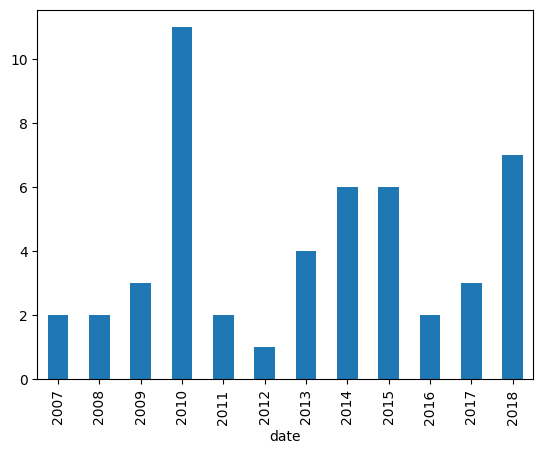

In [29]:
df2 = df[df["snowfall"]>0]
df2.head()

df2.index = pd.to_datetime(df2["date"])

df2["snowfall"].groupby(df2.index.year).count().plot(kind="bar")

D. ¿En qué año se han registrado más nieve (`snowdepth`)? 

E. Crea un dataframe que contenga la temperatura máxima de julio por cada año.

In [ ]:
df = pd.read_csv("data/rdu-weather-history.csv",sep=";")
df.index = pd.to_datetime(df["date"])

dfjulio = df[df.index.month==6]
dfjulio.head()

dfjulio.groupby(dfjulio.index.year)["temperaturemax"].max()
df

date
2007     97.0
2008    100.9
2009     97.0
2010    100.9
2011     99.0
2012    105.1
2013     93.9
2014     97.0
2015    100.0
2016     93.0
2017     93.0
2018     96.1
2019     93.0
Name: temperaturemax, dtype: float64

F. ¿Cuál fue la temperaturemax de cada principio de mes?

# Pivotación de tablas 

Pivotar una tabla consiste en organizar las columnas a filas o las filas a columnas. Con ello disponemos los datos *transpuestos* a la modelización original.

Enlace a la documentación:
- https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
- https://pandas.pydata.org/docs/reference/api/pandas.pivot.html

In [1]:
import pandas as pd
import numpy as np

samples=5
df= pd.DataFrame(
    {
        "Municipio":np.repeat(["muni%i"%i for i in range(samples)],3) ,
        "Categoria"   :["Inscritos","Censo","Población"]*(samples),
        "Values"   : np.random.randint(1,10,samples*3)
    })
    
    
print(df)

   Municipio  Categoria  Values
0      muni0  Inscritos       4
1      muni0      Censo       3
2      muni0  Población       4
3      muni1  Inscritos       7
4      muni1      Censo       1
5      muni1  Población       4
6      muni2  Inscritos       5
7      muni2      Censo       1
8      muni2  Población       7
9      muni3  Inscritos       7
10     muni3      Censo       7
11     muni3  Población       8
12     muni4  Inscritos       7
13     muni4      Censo       2
14     muni4  Población       6


In [2]:
df[df["Categoria"]=="Censo"].mean() # !

TypeError: Could not convert ['muni0muni1muni2muni3muni4' 'CensoCensoCensoCensoCenso'] to numeric

In [3]:
# indexcolumn, Grouper, array, or list of the previous
# Keys to group by on the pivot table index. If a list is passed, it can contain any of the other types (except list). 
# If an array is passed, it must be the same length as the data and will be used in the same manner as column values.
pd.pivot_table(df, index=['Categoria'],values="Values")

,Values
Categoria,
Censo,2.8
Inscritos,6.0
Población,5.8


In [14]:
df2 = pd.pivot_table(df, index=['Municipio'],columns=["Categoria"])
df2[("Values","Censo")].sum()


np.float64(14.0)

In [9]:
df2.reset_index(inplace=True)

In [10]:
df2

Municipio Values                    
Categoria            Censo Inscritos Población
0             muni0    3.0       4.0       4.0
1             muni1    1.0       7.0       4.0
2             muni2    1.0       5.0       7.0
3             muni3    7.0       7.0       8.0
4             muni4    2.0       7.0       6.0

In [4]:
df2["Censo"].mean() #! Alerta, pivotar también genera multi-columas/indices. 

NameError: name 'df2' is not defined

In [15]:
# aggfuncfunction, list of functions, dict, default “mean”
# If a list of functions is passed, the resulting pivot table will have hierarchical columns whose top level are the function names
#  (inferred from the function objects themselves).
pd.pivot_table(df, index=['Categoria'],values="Values", aggfunc="sum")


,Values
Categoria,
Censo,14
Inscritos,30
Población,29


In [16]:
# Multi_index 
sales_data = pd.DataFrame({
    'Region': ['North', 'North', 'North', 'South', 'South', 'South', 'East', 'East', 'East'],
    'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Quarter': ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3'],
    'Sales': [100, 150, 200, 120, 160, 210, 110, 170, 190],
    'Units': [10, 15, 20, 12, 16, 21, 11, 17, 19]
})

print(sales_data)


  Region Product Quarter  Sales  Units
0  North       A      Q1    100     10
1  North       B      Q1    150     15
2  North       C      Q1    200     20
3  South       A      Q2    120     12
4  South       B      Q2    160     16
5  South       C      Q2    210     21
6   East       A      Q3    110     11
7   East       B      Q3    170     17
8   East       C      Q3    190     19


In [86]:
pivot_multi_index = pd.pivot_table(sales_data,
                                   index=['Region', 'Product'],
                                   columns='Quarter',
                                   values='Sales')
print(pivot_multi_index)

Quarter            Q1     Q2     Q3
Region Product                     
East   A          NaN    NaN  110.0
       B          NaN    NaN  170.0
       C          NaN    NaN  190.0
North  A        100.0    NaN    NaN
       B        150.0    NaN    NaN
       C        200.0    NaN    NaN
South  A          NaN  120.0    NaN
       B          NaN  160.0    NaN
       C          NaN  210.0    NaN


In [ ]:
# Incomplete data
pivot_multi_index = pd.pivot_table(sales_data,
                                   index=['Region', 'Product'],
                                   columns='Quarter',
                                   values='Sales',
                                   fill_value=0)
print(pivot_multi_index)

Quarter            Q1     Q2     Q3
Region Product                     
East   A          0.0    0.0  110.0
       B          0.0    0.0  170.0
       C          0.0    0.0  190.0
North  A        100.0    0.0    0.0
       B        150.0    0.0    0.0
       C        200.0    0.0    0.0
South  A          0.0  120.0    0.0
       B          0.0  160.0    0.0
       C          0.0  210.0    0.0


### Actividades

In [ ]:
# A
df_experiment = pd.read_csv("data/experiment.csv")
print(df_experiment)

## Get: 
# - Index: 'Categoria'
# - Columns: 'Sexo'
# - Values: 'Altura'
# - Aggregations: ['mean', 'min', 'max', 'std']

   Nombre Apellidos  Altura Sexo  Nacimiento   Cof Categoria
0    Will     Smith    1.43    M  10/10/1920  0.19   laboral
1     Jon      Snow    1.98    M   10/1/1970  0.98   laboral
2    Laia   Ramirez    1.87    F  09/10/1987  0.76      cap6
3    Luzy      Raim    1.67    F  23/07/1979  0.56      cap6
4    Fein      Mang    1.78    M  12/03/1937  0.27      cap6
5  Victor     Colom    1.78    M  22/09/1957  0.97      cap8


In [ ]:
# B
df_groups = pd.read_csv("data/data_groups.csv")
print(df_groups)

# Crear a pivot table con:
# - mostrando los puntos medios por ciudad y tipo de certificado
# - limitando a las 5 ciudades con mas población
# - incluyendo los márgenes!! MARGINS ¿Investiga que son los MARGINS y MARGINS_NAME?





     Unnamed: 0        Dni                           Nom    CP      Ciutat  \
0             0  H61414629     María Dolores Arjona Jove  7800     Eivissa   
1             1  S3138381C                  Núria Quirós  7511     Ruberts   
2             2  J8698188C  Miguel José María Gil Vargas  7340       Alaro   
3             3  A48821615       Jordi Chaves Bustamante  7609  Bellavista   
4             4  U0247281I    Jana Rosa Collado Menéndez  7006       Palma   
..          ...        ...                           ...   ...         ...   
995         995  W8757353A              Joan Téllez Pera  7529      Ariany   
996         996  H72967045    Álex Javier Campos Palomar  7701         Mao   
997         997  N9389400D   Èric José Guerrero Hernando  7800     Eivissa   
998         998  C61296679                   Èric Pinedo  7009       Palma   
999         999  H90312224          Pol Iglesias Domingo  7609  Bellavista   

    Sexe Tipus certificat cat  Punts  
0      M                